In [104]:
######################
# SMOTE NC TRIAL
#####################

In [105]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [106]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [107]:
print(f'Original dataset shape {X.shape}')
print(y.shape)

Original dataset shape (3520, 36)
(3520, 1)


In [108]:
y['a1c_test']=y['a1c_test'].astype('category')

In [109]:
Counter(y)

Counter({'a1c_test': 1})

In [110]:
y.value_counts()

a1c_test
0           3122
1            398
Name: count, dtype: int64

In [111]:
X_factors = ['ALQ111', 'SMQ020', 'DPQ010', 'DPQ040', 'DPQ050', 'DPQ060', 'DMDBORN', 'DMDEDUC', 'DMDMARTX']
X[X_factors] = X[X_factors].astype('category')


In [112]:
sm = SMOTENC(random_state=42, categorical_features= ['ALQ111', 'SMQ020', 'DPQ010', 'DPQ040', 'DPQ050', 'DPQ060', 'DMDBORN', 'DMDEDUC', 'DMDMARTX'])
X_res, y_res = sm.fit_resample(X, y)

In [113]:
y_res.value_counts()

a1c_test
0           3122
1           3122
Name: count, dtype: int64

In [114]:
X_res.shape

(6244, 36)

In [115]:
y_res.shape


(6244, 1)

In [116]:
### scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_res)
X_scaled = sc.transform(X_res)


In [117]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_scaled, y_res, test_size=0.2, random_state=50)

In [118]:
from sklearn.linear_model import LogisticRegression

# l1 LASSO, C=10, solver=SAGA
lr = LogisticRegression(penalty='l1', C=10, random_state=20, solver='saga', max_iter = 10000)
lr.fit(X_train_balanced, y_train_balanced.values.ravel())

LogisticRegression(C=10, max_iter=10000, penalty='l1', random_state=20,
                   solver='saga')

In [119]:
#from sklearn.linear_model import LogisticRegression

# NOT l1 LASSO, C=100, solver=SAGA
#lr = LogisticRegression(C=1000, random_state=2, solver='saga', max_iter = 10000)
#lr.fit(X_train, y_train.values.ravel())

In [120]:
from sklearn import metrics

# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train_balanced, lr.predict(X_train_balanced)))
print("Train - Confusion matrix : \n",metrics.confusion_matrix(y_train_balanced, lr.predict(X_train_balanced)))
print("Train - classification report :\n", metrics.classification_report(y_train_balanced, lr.predict(X_train_balanced)))

print("Test - Accuracy : ", metrics.accuracy_score(y_test_balanced, lr.predict(X_test_balanced)))
print("Test - Confusion matrix :\n",metrics.confusion_matrix(y_test_balanced, lr.predict(X_test_balanced)))
print("Test - classification report :\n", metrics.classification_report(y_test_balanced, lr.predict(X_test_balanced)))

Train - Accuracy : 0.794994994994995
Train - Confusion matrix : 
 [[1896  583]
 [ 441 2075]]
Train - classification report :
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      2479
           1       0.78      0.82      0.80      2516

    accuracy                           0.79      4995
   macro avg       0.80      0.79      0.79      4995
weighted avg       0.80      0.79      0.79      4995

Test - Accuracy :  0.7862289831865492
Test - Confusion matrix :
 [[481 162]
 [105 501]]
Test - classification report :
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       643
           1       0.76      0.83      0.79       606

    accuracy                           0.79      1249
   macro avg       0.79      0.79      0.79      1249
weighted avg       0.79      0.79      0.79      1249



In [121]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [122]:
############ RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
#!pip install graphviz

In [123]:
rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced.values.ravel())

RandomForestClassifier()

In [124]:
from sklearn import metrics

# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train_balanced, rf.predict(X_train_balanced)))
print("Train - Confusion matrix : \n",metrics.confusion_matrix(y_train_balanced, rf.predict(X_train_balanced)))
print("Train - classification report :\n", metrics.classification_report(y_train_balanced, rf.predict(X_train_balanced)))

print("Test - Accuracy : ", metrics.accuracy_score(y_test_balanced, rf.predict(X_test_balanced)))
print("Test - Confusion matrix :\n",metrics.confusion_matrix(y_test_balanced, rf.predict(X_test_balanced)))
print("Test - classification report :\n", metrics.classification_report(y_test_balanced, rf.predict(X_test_balanced)))

Train - Accuracy : 1.0
Train - Confusion matrix : 
 [[2479    0]
 [   0 2516]]
Train - classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2516

    accuracy                           1.00      4995
   macro avg       1.00      1.00      1.00      4995
weighted avg       1.00      1.00      1.00      4995

Test - Accuracy :  0.921537229783827
Test - Confusion matrix :
 [[585  58]
 [ 40 566]]
Test - classification report :
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       643
           1       0.91      0.93      0.92       606

    accuracy                           0.92      1249
   macro avg       0.92      0.92      0.92      1249
weighted avg       0.92      0.92      0.92      1249



In [125]:
y_pred = rf.predict(X_test_balanced)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy_score(y_test_balanced, y_pred)

0.921537229783827

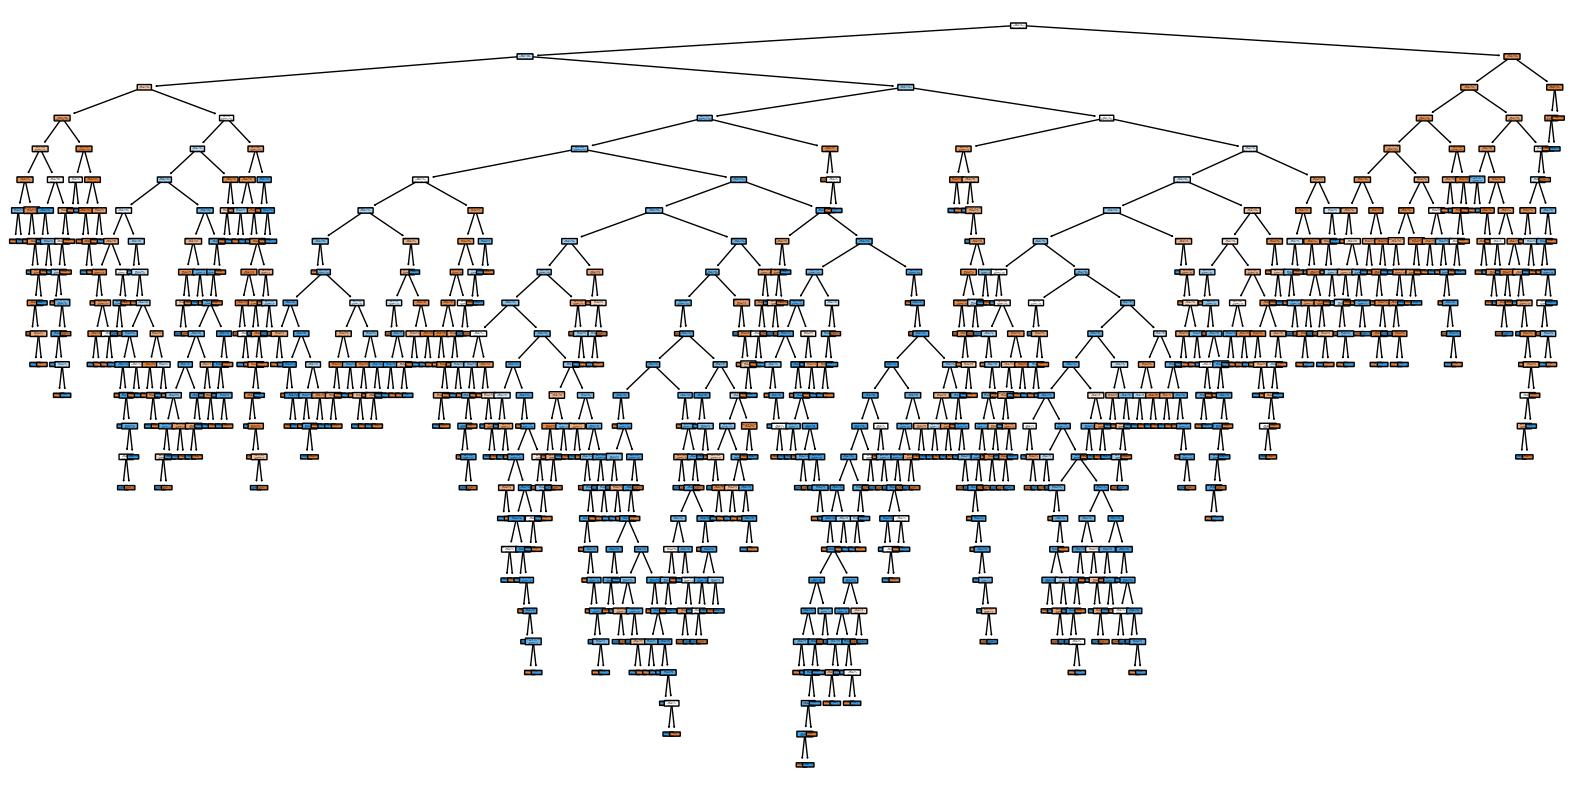

In [127]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree = rf.estimators_[0]
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.savefig("TREE_PLOT.png", dpi=600)
plt.show()


In [128]:
from sklearn.tree import export_text

# Print text-based tree representation
tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

|--- INDFMPIR <= 1.37
|   |--- BPXOSY <= -0.71
|   |   |--- BMXBMI <= -0.56
|   |   |   |--- RIAGENDR <= 0.18
|   |   |   |   |--- DR1TCAFF <= -0.47
|   |   |   |   |   |--- DR1TMFAT <= -1.15
|   |   |   |   |   |   |--- SLD012 <= 1.14
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- SLD012 >  1.14
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- DR1TMFAT >  -1.15
|   |   |   |   |   |   |--- DR1_320Z <= -0.16
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- DR1_320Z >  -0.16
|   |   |   |   |   |   |   |--- DR1TPFAT <= -1.07
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- DR1TPFAT >  -1.07
|   |   |   |   |   |   |   |   |--- DR1TVB12 <= 0.89
|   |   |   |   |   |   |   |   |   |--- DR1TVB12 <= 0.63
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- DR1TVB12 >  0.63
|   |   |   |   |   |   |   |   |   |   |--- DMDMARTX <= -0.12
|   |   |   

In [129]:
from sklearn.tree import export_graphviz
import graphviz

# Assuming rf_classifier is already trained
# Select one tree from the random forest (e.g., the first one)
tree = rf.estimators_[0]

# Export the selected tree to DOT format
dot_file_path = "random_forest_tree.dot"
export_graphviz(
    tree, 
    out_file=dot_file_path, 
    feature_names=X.columns,  # Feature names from the Iris dataset
    class_names=['Negative', 'Positive'],  # Class names (setosa, versicolor, virginica)
    filled=True,  # Color the nodes
    rounded=True,  # Rounded corners for nodes
    special_characters=True  # Allows special characters in labels
)

with open(dot_file_path) as f:
    dot_graph = f.read()

# Visualize the tree using graphviz
graph = graphviz.Source(dot_graph)
graph.render("random_forest_tree")
graph  # Display the tree graph
graph.render(filename='graphviz_rforest', format='png')

'graphviz_rforest.png'

In [130]:
#pip install graphviz


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np


## dataset y_res, X_scaled (SMOTE-NC)
#10 folds
# K-Fold split
cnt = 0
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X_scaled, y_res):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, \
    Test set:{len(test_index)}')
    cnt += 1




Fold:0, Train set: 5619,     Test set:625
Fold:1, Train set: 5619,     Test set:625
Fold:2, Train set: 5619,     Test set:625
Fold:3, Train set: 5619,     Test set:625
Fold:4, Train set: 5620,     Test set:624
Fold:5, Train set: 5620,     Test set:624
Fold:6, Train set: 5620,     Test set:624
Fold:7, Train set: 5620,     Test set:624
Fold:8, Train set: 5620,     Test set:624
Fold:9, Train set: 5620,     Test set:624


In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

def cross_validation(reg_model, housing_prepared, housing_labels, cv):
    scores = cross_val_score(
      reg_model, housing_prepared,
      housing_labels,
      scoring="accuracy", cv=cv)
    accuracy_scores = scores
    print("Scores:", accuracy_scores)
    print("Mean:", accuracy_scores.mean())
    print("StandardDeviation:", accuracy_scores.std())

In [133]:
def cross_validation_metrics(reg_model, housing_prepared, housing_labels, cv, metrics):
    scores = cross_val_score(
      reg_model, housing_prepared,
      housing_labels,
      scoring=metrics, cv=cv)
    metric_scores = scores
    print(metrics)
    print("Scores:", metric_scores)
    print("Mean:",metric_scores.mean())
    print("StandardDeviation:", metric_scores.std())

In [134]:
log_reg = LogisticRegression(penalty='l1', C=10, random_state=10, solver='saga', max_iter = 10000)
cross_validation(log_reg, X_scaled, y_res.values.ravel(), kf)

Scores: [0.784      0.7744     0.8208     0.7888     0.77724359 0.78365385
 0.77403846 0.80288462 0.78846154 0.7900641 ]
Mean: 0.7884346153846153
StandardDeviation: 0.013531778811526448


In [135]:
forest_reg = RandomForestClassifier()
cross_validation(forest_reg, X_scaled, y_res.values.ravel(), kf)

Scores: [0.9232     0.9152     0.928      0.912      0.91185897 0.90705128
 0.91666667 0.9150641  0.92467949 0.90224359]
Mean: 0.9155964102564103
StandardDeviation: 0.007576090474450179


In [136]:
### ORIGINAL DATA
## dataset y, X_scaled_orig (NOT SMOTE-NC)
#10 folds
# K-Fold split

sc = StandardScaler()
sc.fit(X)
X_scaled_orig = sc.transform(X)



cnt = 0
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X_scaled_orig, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, \
    Test set:{len(test_index)}')
    cnt += 1

Fold:0, Train set: 3168,     Test set:352
Fold:1, Train set: 3168,     Test set:352
Fold:2, Train set: 3168,     Test set:352
Fold:3, Train set: 3168,     Test set:352
Fold:4, Train set: 3168,     Test set:352
Fold:5, Train set: 3168,     Test set:352
Fold:6, Train set: 3168,     Test set:352
Fold:7, Train set: 3168,     Test set:352
Fold:8, Train set: 3168,     Test set:352
Fold:9, Train set: 3168,     Test set:352


In [137]:
### NON CV FOREST unbalanced
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_orig, y, test_size=0.3)

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())



RandomForestClassifier()

In [138]:

# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, rf.predict(X_train)))
print("Train - Confusion matrix : \n",metrics.confusion_matrix(y_train, rf.predict(X_train)))
print("Train - classification report :\n", metrics.classification_report(y_train, rf.predict(X_train)))

print("Test - Accuracy : ", metrics.accuracy_score(y_test, rf.predict(X_test)))
print("Test - Confusion matrix :\n",metrics.confusion_matrix(y_test, rf.predict(X_test)))
print("Test - classification report :\n", metrics.classification_report(y_test, rf.predict(X_test)))

Train - Accuracy : 0.9995941558441559
Train - Confusion matrix : 
 [[2171    0]
 [   1  292]]
Train - classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2171
           1       1.00      1.00      1.00       293

    accuracy                           1.00      2464
   macro avg       1.00      1.00      1.00      2464
weighted avg       1.00      1.00      1.00      2464

Test - Accuracy :  0.8996212121212122
Test - Confusion matrix :
 [[949   2]
 [104   1]]
Test - classification report :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       951
           1       0.33      0.01      0.02       105

    accuracy                           0.90      1056
   macro avg       0.62      0.50      0.48      1056
weighted avg       0.84      0.90      0.85      1056



In [139]:
########## RANDOM FOREST ORIGINAL DATA
cross_validation(forest_reg, X_scaled_orig, y.values.ravel(), kf)

Scores: [0.88636364 0.88352273 0.89204545 0.88920455 0.87784091 0.90625
 0.88352273 0.89488636 0.875      0.86363636]
Mean: 0.8852272727272726
StandardDeviation: 0.011090466645422238


In [140]:
#### log reg original data

cross_validation(log_reg, X_scaled_orig, y.values.ravel(), kf)

Scores: [0.88636364 0.88920455 0.90056818 0.86931818 0.88636364 0.90625
 0.88636364 0.90056818 0.88636364 0.85795455]
Mean: 0.886931818181818
StandardDeviation: 0.013789387613081365


In [141]:
from sklearn.model_selection import StratifiedKFold
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X_scaled, y_res):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, \
    Test set:{len(test_index)}')
    cnt += 1


Fold:10, Train set: 5619,     Test set:625
Fold:11, Train set: 5619,     Test set:625
Fold:12, Train set: 5619,     Test set:625
Fold:13, Train set: 5619,     Test set:625
Fold:14, Train set: 5620,     Test set:624
Fold:15, Train set: 5620,     Test set:624
Fold:16, Train set: 5620,     Test set:624
Fold:17, Train set: 5620,     Test set:624
Fold:18, Train set: 5620,     Test set:624
Fold:19, Train set: 5620,     Test set:624


In [142]:
## SKF FOREST precision
cross_validation(forest_reg, X_scaled_orig, y.values.ravel(), skf) 

Scores: [0.88636364 0.89204545 0.88068182 0.88920455 0.88636364 0.88636364
 0.88636364 0.88636364 0.88352273 0.88636364]
Mean: 0.8863636363636364
StandardDeviation: 0.0028409090909090827


In [143]:
### SKF LOGREG precision
cross_validation(log_reg, X_scaled_orig, y.values.ravel(), skf)

Scores: [0.89204545 0.88920455 0.86647727 0.88636364 0.89488636 0.89204545
 0.90056818 0.88636364 0.87784091 0.88920455]
Mean: 0.8875
StandardDeviation: 0.009001692907815266


In [144]:
## KF LOG REG, original data
cross_validation(log_reg, X_scaled_orig, y.values.ravel(), kf)

Scores: [0.88636364 0.88920455 0.90056818 0.86931818 0.88636364 0.90625
 0.88636364 0.90056818 0.88636364 0.85795455]
Mean: 0.886931818181818
StandardDeviation: 0.013789387613081365


In [145]:
## KF FOREST
cross_validation(forest_reg, X_scaled_orig, y.values.ravel(), kf) 

Scores: [0.88636364 0.88352273 0.89488636 0.89204545 0.87784091 0.90340909
 0.88352273 0.89488636 0.88068182 0.86363636]
Mean: 0.8860795454545455
StandardDeviation: 0.010511363636363642


In [146]:
###precision log reg
cross_validation_metrics(log_reg, X_scaled_orig, y.values.ravel(), skf, 'average_precision')

average_precision
Scores: [0.40325278 0.32908933 0.22693344 0.36654614 0.36057143 0.3735374
 0.43089187 0.35107463 0.26514447 0.30225531]
Mean: 0.3409296780352109
StandardDeviation: 0.058787745516641406


In [147]:
###accuracy log reg
cross_validation_metrics(log_reg, X_scaled_orig, y.values.ravel(), skf, 'accuracy')

accuracy
Scores: [0.89204545 0.88920455 0.86647727 0.88636364 0.89488636 0.89204545
 0.90056818 0.88636364 0.87784091 0.88920455]
Mean: 0.8875
StandardDeviation: 0.009001692907815266


In [148]:
######## random forest precision
cross_validation_metrics(forest_reg, X_scaled_orig, y.values.ravel(), skf, 'average_precision')

average_precision
Scores: [0.26369023 0.24910737 0.16795087 0.34396292 0.32824021 0.25129232
 0.33379433 0.35835964 0.25420055 0.24980251]
Mean: 0.28004009678642144
StandardDeviation: 0.05624004046406884


In [149]:
#!pip install shap

In [278]:
import shap
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_test)

#shap.plots.bar(explainer(X_test))
#shap.summary_plot(shap_values[1], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [272]:
X.columns
shap_values[0]

array([[-0.0038287 ,  0.0038287 ],
       [ 0.00298125, -0.00298125],
       [-0.00711384,  0.00711384],
       [-0.00217868,  0.00217868],
       [ 0.00230835, -0.00230835],
       [ 0.00315378, -0.00315378],
       [ 0.00387852, -0.00387852],
       [ 0.00053496, -0.00053496],
       [ 0.00447611, -0.00447611],
       [ 0.00372061, -0.00372061],
       [-0.00646307,  0.00646307],
       [ 0.00222372, -0.00222372],
       [ 0.00254174, -0.00254174],
       [ 0.00393962, -0.00393962],
       [ 0.00636194, -0.00636194],
       [-0.00050929,  0.00050929],
       [ 0.00011082, -0.00011082],
       [ 0.00045658, -0.00045658],
       [ 0.00154988, -0.00154988],
       [-0.00297246,  0.00297246],
       [ 0.01733973, -0.01733973],
       [ 0.00080374, -0.00080374],
       [ 0.01196536, -0.01196536],
       [ 0.01788364, -0.01788364],
       [-0.0056695 ,  0.0056695 ],
       [ 0.009953  , -0.009953  ],
       [ 0.03297782, -0.03297782],
       [ 0.00128011, -0.00128011],
       [ 0.0013598 ,

In [197]:
feature_names = X.columns
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

     Feature  Gini Importance
26  BMXWAIST         0.086373
25    BMXBMI         0.061627
23    BPXOSY         0.047061
24    BPXODI         0.046999
6   DR1TSFAT         0.038045
7   DR1TMFAT         0.036706
13  DR1TCAFF         0.036594
8   DR1TPFAT         0.036532
22  INDFMPIR         0.036147
3   DR1TSUGR         0.035746
14  DR1TSODI         0.035568
9   DR1TCHOL         0.034873
11    DR1TVC         0.034422
4   DR1TFIBE         0.034357
10  DR1TVB12         0.033928
0   DR1TKCAL         0.033472
12  DR1TMAGN         0.033155
16  DR1_320Z         0.033071
2   DR1TCARB         0.032336
5   DR1TTFAT         0.032078
1   DR1TPROT         0.032069
31    SLD012         0.030919
28    PAD680         0.027456
20   DMDEDUC         0.023637
29   PAD790Q         0.019485
34    DPQ050         0.011504
15  DR1TALCO         0.010160
18   RIDRETH         0.006160
30    SMQ020         0.005935
19  RIAGENDR         0.005405
35    DPQ060         0.005349
21  DMDMARTX         0.005139
32    DPQ0

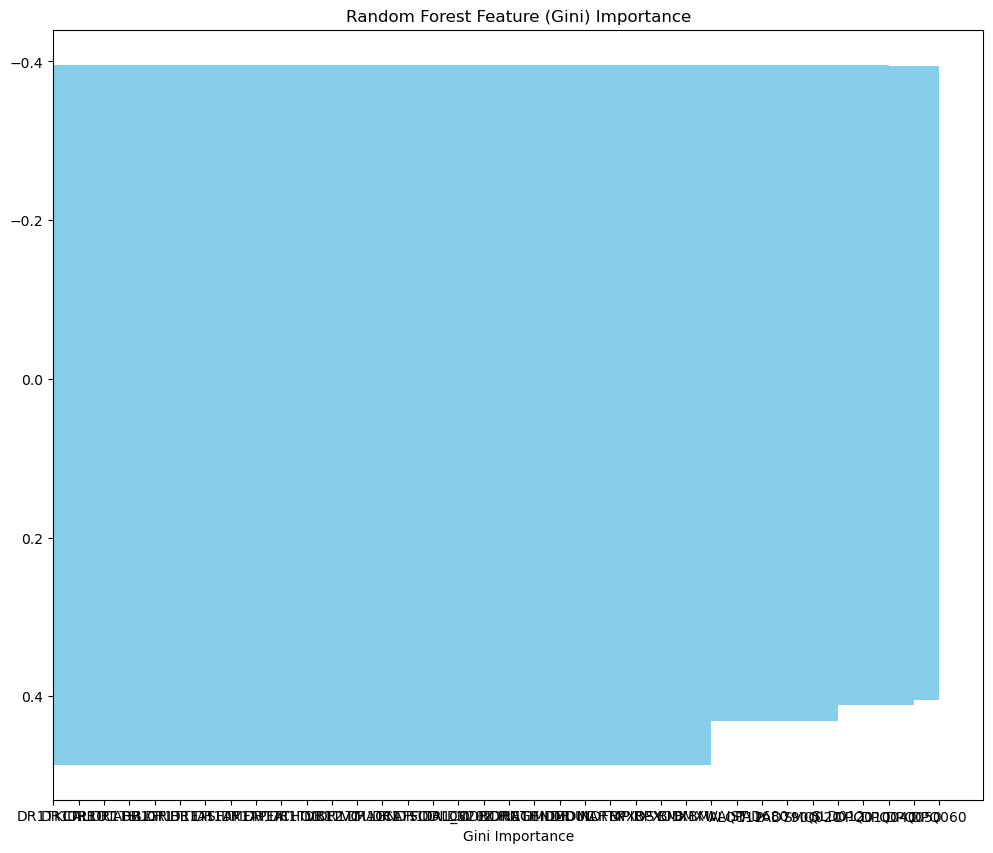

In [198]:
plt.figure(figsize=(12, 10))
plt.barh(importances, feature_names, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Random Forest Feature (Gini) Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.savefig('Random_Forest_Feature_Importance.png')
plt.show()


In [199]:
###roc_auc log reg
cross_validation_metrics(log_reg, X_scaled_orig, y.values.ravel(), skf, 'roc_auc')

roc_auc
Scores: [0.80642254 0.78676169 0.74030449 0.80224359 0.7338141  0.78429487
 0.80088141 0.79238782 0.77924679 0.75440705]
Mean: 0.7780764366756779
StandardDeviation: 0.024847579771964206


In [200]:
## roc auc rf
cross_validation_metrics(forest_reg, X_scaled_orig, y.values.ravel(), skf, 'roc_auc')

roc_auc
Scores: [0.75894978 0.76431556 0.64759615 0.725      0.75584936 0.72151442
 0.75020032 0.74611378 0.70917468 0.73401442]
Mean: 0.7312728480584909
StandardDeviation: 0.03266886998480112


In [201]:
## precision rf
cross_validation_metrics(forest_reg, X_scaled_orig, y.values.ravel(), skf, 'roc_auc')

roc_auc
Scores: [0.7559597  0.75669698 0.64639423 0.68910256 0.7400641  0.72788462
 0.74058494 0.76502404 0.69350962 0.72784455]
Mean: 0.7243065326247236
StandardDeviation: 0.03536337490927962


In [202]:
## roc auc log reg balanced

cross_validation_metrics(log_reg, X_scaled, y_res.values.ravel(), kf, 'roc_auc')

roc_auc
Scores: [0.8687286  0.85369775 0.88336714 0.85229345 0.84582974 0.86092354
 0.86349252 0.86113943 0.84954634 0.84981312]
Mean: 0.8588831611460417
StandardDeviation: 0.010663229731803064


In [203]:
## roc auc rf balanced

cross_validation_metrics(forest_reg, X_scaled, y_res.values.ravel(), kf, 'roc_auc')

roc_auc
Scores: [0.98071679 0.97354435 0.97873256 0.97322435 0.97257677 0.97649977
 0.97654837 0.97660087 0.97458872 0.97261092]
Mean: 0.9755643473328766
StandardDeviation: 0.002601137110627021


In [204]:
## roc auc rf balanced precision
cross_validation_metrics(forest_reg, X_scaled, y_res.values.ravel(), kf, 'precision')

precision
Scores: [0.88580247 0.8875     0.93377483 0.91875    0.90273556 0.86769231
 0.90353698 0.92638037 0.9015873  0.93103448]
Mean: 0.9058794303511271
StandardDeviation: 0.02056649647351895


In [205]:
## roc auc rf balanced recall
cross_validation_metrics(forest_reg, X_scaled, y_res.values.ravel(), kf, 'recall')

recall
Scores: [0.93046358 0.94212219 0.93137255 0.91509434 0.94025157 0.94630872
 0.91233766 0.93272171 0.91856678 0.89602446]
Mean: 0.9265263563407616
StandardDeviation: 0.014919965340476009


In [206]:
## log reg balanced precision
cross_validation_metrics(log_reg, X_scaled, y_res.values.ravel(), kf, 'precision')

precision
Scores: [0.75851393 0.7672956  0.79216867 0.77192982 0.75498575 0.75873016
 0.76848875 0.80357143 0.76119403 0.81012658]
Mean: 0.7747004729030297
StandardDeviation: 0.01892860997405642


In [207]:
## log reg balanced accuracy
cross_validation_metrics(log_reg, X_scaled, y_res.values.ravel(), kf, 'accuracy')

accuracy
Scores: [0.784      0.7744     0.8208     0.7888     0.77724359 0.78365385
 0.77403846 0.80288462 0.78846154 0.7900641 ]
Mean: 0.7884346153846153
StandardDeviation: 0.013531778811526448


In [208]:
## LR balanced recall
cross_validation_metrics(log_reg, X_scaled, y_res.values.ravel(), kf, 'recall')


recall
Scores: [0.81125828 0.78456592 0.85947712 0.83018868 0.83333333 0.80201342
 0.77597403 0.82568807 0.83061889 0.78287462]
Mean: 0.8135992363738491
StandardDeviation: 0.02558815534736646


In [209]:
##  LR orig accuracy skf
cross_validation_metrics(log_reg, X_scaled_orig, y.values.ravel(), skf, 'accuracy')

accuracy
Scores: [0.89204545 0.88920455 0.86647727 0.88636364 0.89488636 0.89204545
 0.90056818 0.88636364 0.87784091 0.88920455]
Mean: 0.8875
StandardDeviation: 0.009001692907815266


In [210]:
##  LR orig precision skf
cross_validation_metrics(log_reg, X_scaled_orig, y.values.ravel(), skf, 'precision')

precision
Scores: [0.55555556 0.5        0.18181818 0.5        0.66666667 0.66666667
 0.72727273 0.5        0.28571429 0.55555556]
Mean: 0.5139249639249639
StandardDeviation: 0.16081053391772032


In [211]:
##  LR orig recall skf
cross_validation_metrics(forest_reg, X_scaled_orig, y.values.ravel(), skf, 'recall')

recall
Scores: [0.    0.    0.    0.    0.025 0.    0.025 0.    0.025 0.   ]
Mean: 0.0075000000000000015
StandardDeviation: 0.011456439237389602


In [212]:
##  RF orig recall skf
cross_validation_metrics(log_reg, X_scaled_orig, y.values.ravel(), skf, 'recall')

recall
Scores: [0.12820513 0.05128205 0.05       0.05       0.15       0.1
 0.2        0.025      0.05       0.125     ]
Mean: 0.09294871794871795
StandardDeviation: 0.053778956849947435


In [213]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())


RandomForestClassifier()

In [214]:
### SVM attempt
from sklearn import svm

svf = svm.SVC()
svf.fit(X_train, y_train.values.ravel())



SVC()

In [215]:
##  SVM orig accuracy skf
cross_validation_metrics(svf, X_scaled_orig, y.values.ravel(), skf, 'accuracy')

accuracy
Scores: [0.88920455 0.88920455 0.88636364 0.88636364 0.88636364 0.88636364
 0.88636364 0.88636364 0.88636364 0.88636364]
Mean: 0.8869318181818182
StandardDeviation: 0.0011363636363636244


In [216]:
## SVM balanced accuracy skf
cross_validation_metrics(svf, X_scaled, y_res.values.ravel(), kf, 'accuracy')

accuracy
Scores: [0.8688     0.8768     0.8912     0.8704     0.87980769 0.87820513
 0.89102564 0.89102564 0.87179487 0.87019231]
Mean: 0.8789251282051284
StandardDeviation: 0.008669657032270621


In [217]:
## SVM balanced auc_roc skf
cross_validation_metrics(svf, X_scaled, y_res.values.ravel(), kf, 'roc_auc')

roc_auc
Scores: [0.9482398  0.94732423 0.9617268  0.9382644  0.9394911  0.93623132
 0.95405228 0.94949495 0.94461513 0.9349046 ]
Mean: 0.9454344606595768
StandardDeviation: 0.008066078938659254


In [218]:
##  SVM orig auc_roc skf
cross_validation_metrics(svf, X_scaled_orig, y.values.ravel(), skf, 'roc_auc')

roc_auc
Scores: [0.64397477 0.72876219 0.65673077 0.73613782 0.70296474 0.71610577
 0.71137821 0.67483974 0.73277244 0.69799679]
Mean: 0.7001663236257885
StandardDeviation: 0.030418275087239217


In [219]:
y.value_counts()

a1c_test
0           3122
1            398
Name: count, dtype: int64

In [220]:
y_res.value_counts()

a1c_test
0           3122
1           3122
Name: count, dtype: int64

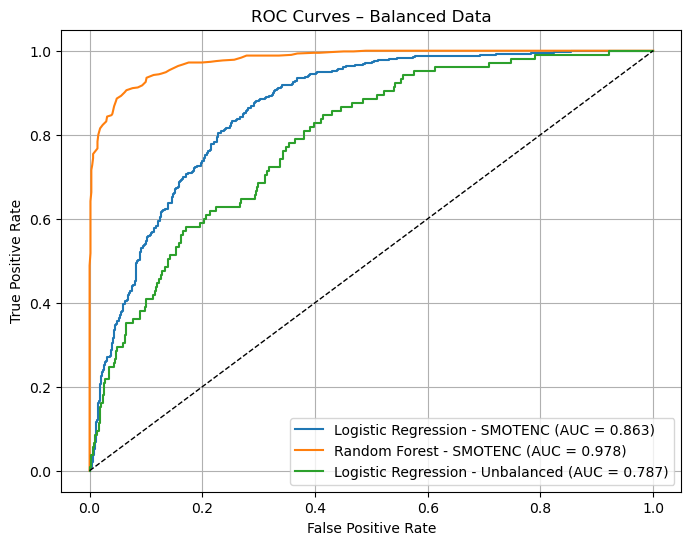

In [221]:
from sklearn.metrics import roc_curve, roc_auc_score


#model_untuned = SVC(kernel='poly', class_weight='balanced', probability=True, random_state=42)
#model_untuned.fit(X_train_scaled, y_train)

## BALANCED
#log_reg = LogisticRegression(penalty='l1', C=10, random_state=10, solver='saga', max_iter = 10000)
log_reg.fit(X_train_balanced, y_train_balanced.values.ravel())
y_proba_log_reg = log_reg.predict_proba(X_test_balanced)[:, 1]
## UNBALANCED
log_reg.fit(X_train, y_train.values.ravel())
y_proba_log_reg_unbalanced = log_reg.predict_proba(X_test)[:, 1]

#random forest
#rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced.values.ravel())
y_proba_ran_for = rf.predict_proba(X_test_balanced)[:,1]

fpr_log_reg_balanced, tpr_log_reg_balanced, _ = roc_curve(y_test_balanced.values.ravel(), y_proba_log_reg )
auc_log_reg_balanced = roc_auc_score(y_test_balanced.values.ravel(), y_proba_log_reg)

fpr_log_reg_unbalanced, tpr_log_reg_unbalanced, _ = roc_curve(y_test.values.ravel(), y_proba_log_reg_unbalanced )
auc_log_reg_unbalanced = roc_auc_score(y_test.values.ravel(), y_proba_log_reg_unbalanced)


fpr_ran_for_balanced, tpr_ran_for_balanced, _ = roc_curve(y_test_balanced.values.ravel(), y_proba_ran_for )
auc_ran_for_balanced = roc_auc_score(y_test_balanced.values.ravel(), y_proba_ran_for)

#y_proba_untuned = model_untuned.predict_proba(X_test_scaled)[:, 1]
#fpr_untuned, tpr_untuned, _ = roc_curve(y_test, y_proba_untuned)
#auc_untuned = roc_auc_score(y_test, y_proba_untuned)

#model_tuned = grid.best_estimator_  # from previous GridSearchCV
#y_proba_tuned = model_tuned.predict_proba(X_test_scaled)[:, 1]
#fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
#auc_tuned = roc_auc_score(y_test, y_proba_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg_balanced, tpr_log_reg_balanced, label=f'Logistic Regression - SMOTENC (AUC = {auc_log_reg_balanced:.3f})')
plt.plot(fpr_ran_for_balanced, tpr_ran_for_balanced, label=f'Random Forest - SMOTENC (AUC = {auc_ran_for_balanced:.3f})')
plt.plot(fpr_log_reg_unbalanced, tpr_log_reg_unbalanced, label=f'Logistic Regression - Unbalanced (AUC = {auc_log_reg_unbalanced:.3f})')

#plt.plot(fpr_tuned, tpr_tuned, label=f'GridSearchCV (AUC = {auc_tuned:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.title("ROC Curves – Balanced Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('ROC_curves_balanced.png')
plt.show()


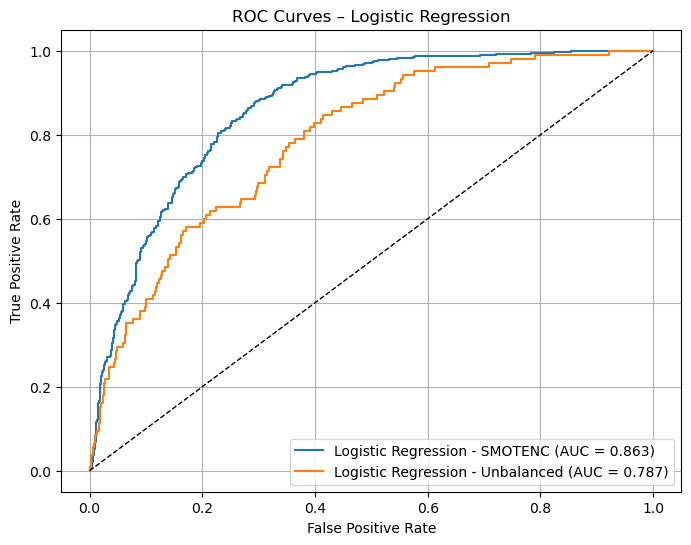

In [222]:

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg_balanced, tpr_log_reg_balanced, label=f'Logistic Regression - SMOTENC (AUC = {auc_log_reg_balanced:.3f})')
#plt.plot(fpr_ran_for_balanced, tpr_ran_for_balanced, label=f'Random Forest - SMOTENC (AUC = {auc_ran_for_balanced:.3f})')
plt.plot(fpr_log_reg_unbalanced, tpr_log_reg_unbalanced, label=f'Logistic Regression - Unbalanced (AUC = {auc_log_reg_unbalanced:.3f})')

#plt.plot(fpr_tuned, tpr_tuned, label=f'GridSearchCV (AUC = {auc_tuned:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.title("ROC Curves – Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('ROC_curves_logistic regression.png')
plt.show()

In [223]:
########### XGBOOST
#!pip install xgboost
import xgboost as xgb



xgbc = xgb.XGBClassifier()
xgbc.fit(X_train_balanced, y_train_balanced.values.ravel())



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [224]:
# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train_balanced, xgbc.predict(X_train_balanced)))
print("Train - Confusion matrix : \n",metrics.confusion_matrix(y_train_balanced, rf.predict(X_train_balanced)))
print("Train - classification report :\n", metrics.classification_report(y_train_balanced, rf.predict(X_train_balanced)))

print("Test - Accuracy : ", metrics.accuracy_score(y_test_balanced, xgbc.predict(X_test_balanced)))
print("Test - Confusion matrix :\n",metrics.confusion_matrix(y_test_balanced, xgbc.predict(X_test_balanced)))
print("Test - classification report :\n", metrics.classification_report(y_test_balanced, xgbc.predict(X_test_balanced)))

Train - Accuracy : 1.0
Train - Confusion matrix : 
 [[2479    0]
 [   0 2516]]
Train - classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2479
           1       1.00      1.00      1.00      2516

    accuracy                           1.00      4995
   macro avg       1.00      1.00      1.00      4995
weighted avg       1.00      1.00      1.00      4995

Test - Accuracy :  0.944755804643715
Test - Confusion matrix :
 [[603  40]
 [ 29 577]]
Test - classification report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       643
           1       0.94      0.95      0.94       606

    accuracy                           0.94      1249
   macro avg       0.94      0.94      0.94      1249
weighted avg       0.94      0.94      0.94      1249



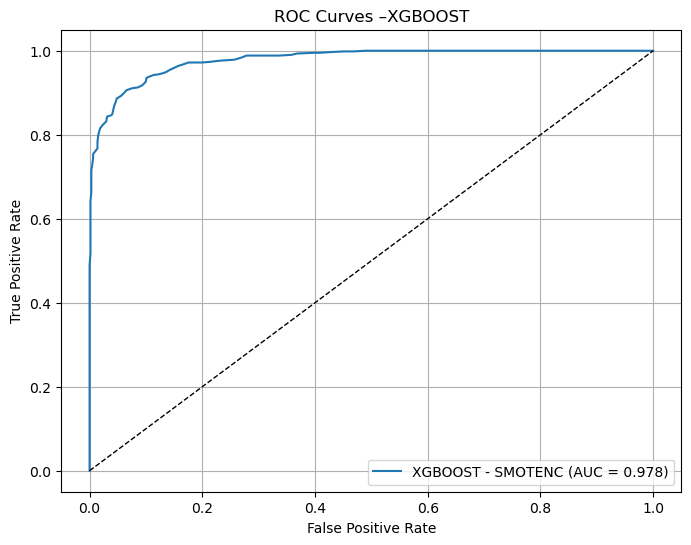

In [225]:
xgbc.fit(X_train_balanced, y_train_balanced.values.ravel())
y_proba_xgbc = rf.predict_proba(X_test_balanced)[:,1]


fpr_xgb_balanced, tpr_xgb_balanced, _ = roc_curve(y_test_balanced.values.ravel(), y_proba_xgbc )
auc_xgb_balanced = roc_auc_score(y_test_balanced.values.ravel(), y_proba_xgbc)



plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_balanced, tpr_xgb_balanced, label=f'XGBOOST - SMOTENC (AUC = {auc_xgb_balanced:.3f})')


#plt.plot(fpr_log_reg_unbalanced, tpr_log_reg_unbalanced, label=f'Logistic Regression - Unbalanced (AUC = {auc_log_reg_unbalanced:.3f})')

#plt.plot(fpr_tuned, tpr_tuned, label=f'GridSearchCV (AUC = {auc_tuned:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.title("ROC Curves –XGBOOST")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('ROC_curves_XGBOOST.png')
plt.show()

In [226]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_balanced.values.ravel(), lr.predict(X_test_balanced) )

0.21377101681345076

In [227]:
mean_squared_error(y_test_balanced.values.ravel(), rf.predict(X_test_balanced) )

0.08326661329063251